## MACHINE LEARNING AND DATA ANALYSIS - FINAL EXAM PROJECT

Federico Ombelli

Tha goal of this  exam project is to create a **classifier algorithm** that can identify credit card fraudolent transactions.

The **Dataset** used to train the model contains a list of transactions labeled as fraudolent or genuine and it is avaliable on *kaggle*.com at the link [ https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud ] 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Importing Credit card fraud Dataset

In [3]:
df = pd.read_csv('./dataset/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## 1. EDA - Exploratory Data Analysis

In [3]:
# dataset shape
df.shape

(1000000, 8)

In [4]:
# dataset features details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(df['repeat_retailer'].value_counts())
print(df['used_chip'].value_counts())
print(df['used_pin_number'].value_counts())
print(df['online_order'].value_counts())

repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64
used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64
used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64
online_order
1.0    650552
0.0    349448
Name: count, dtype: int64


In [20]:
df.isna().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [19]:
print("Duplicated samples: ",df.duplicated().sum())

Duplicated samples:  0


From an initial analysis of the dataset we see that it contains **1 milion samples** and **7 features**.

The first 3 features are **continuous** and contains real values while the last 4 ones are **binary** features that contains only 1 or 0 values to indicate if the feature is present or not in the sample.

The dataset does not contains null or duplicated values.

The column *'fraud'* is our target feature and specify the **label** of the sample, the value 1 indicates that the sample is a fraudolent transaction, 0 instead means a genuine transaction.

The dataset is **highly unbalanced** as shown in the following plots.

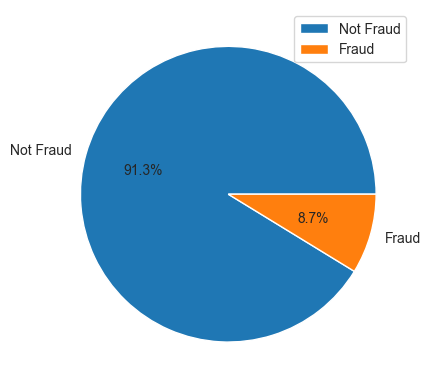

Genuine Transactions: 912597  |  91.2597 % of the samples
Fraudolent Transactions: 87403  |  8.7403 % of the samples


In [18]:
#we show that the dataset is higly unbalanced with the majority of samples representing non fraudolent transactions
plt.pie(df['fraud'].value_counts(), labels=['Not Fraud','Fraud'], autopct='%1.1f%%')
plt.legend()
plt.show()
print('Genuine Transactions:', df['fraud'].value_counts()[0], ' | ',df['fraud'].value_counts()[0]/len(df)* 100, '% of the samples')
print('Fraudolent Transactions:', df['fraud'].value_counts()[1], ' | ',df['fraud'].value_counts()[1]/len(df)* 100, '% of the samples')

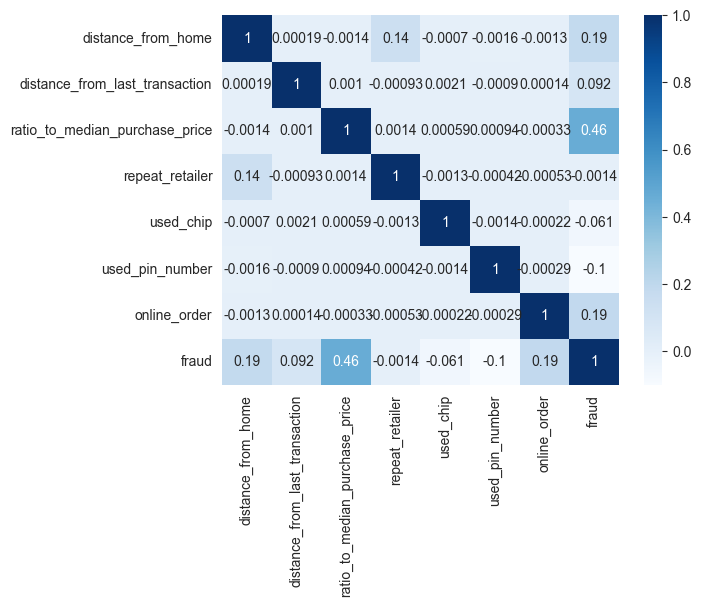

In [3]:
#correlation matrix between features
corr_matrix = df.corr(numeric_only=True)
sns.set_style("whitegrid")
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.show()

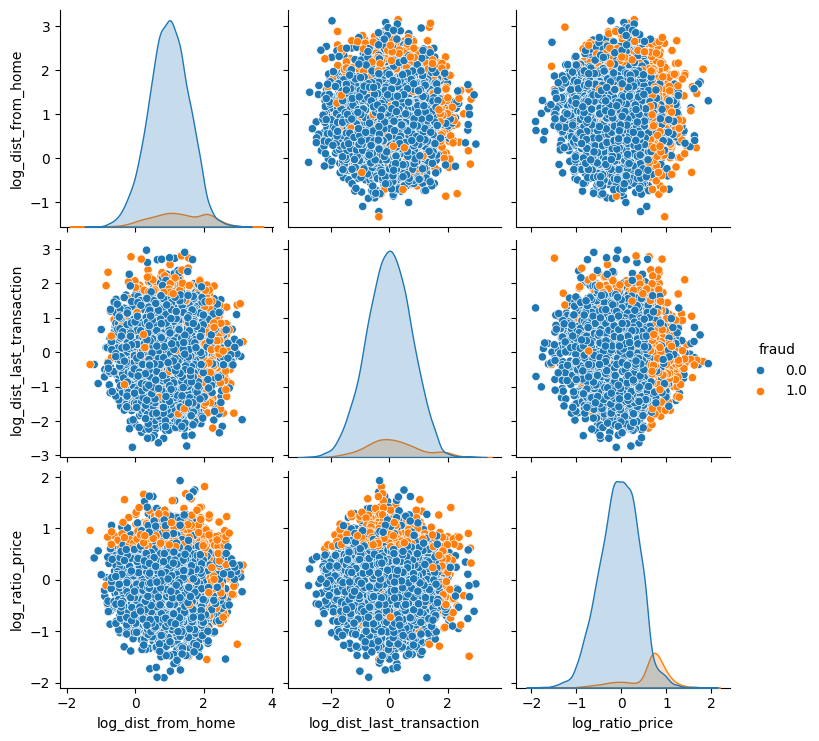

In [6]:
#sample of the dataset and conversion of continuos features to logaritmic scale to simplify plots
df_sampled = df.sample(n=10000, random_state=100)
df_sampled['log_dist_from_home'] = np.log10(df['distance_from_home'])
df_sampled['log_dist_last_transaction'] = np.log10(df['distance_from_last_transaction'])
df_sampled['log_ratio_price'] = np.log10(df['ratio_to_median_purchase_price'])

sns.pairplot(data=df_sampled[['log_dist_from_home','log_dist_last_transaction', 'log_ratio_price','fraud']], hue='fraud')
plt.show()

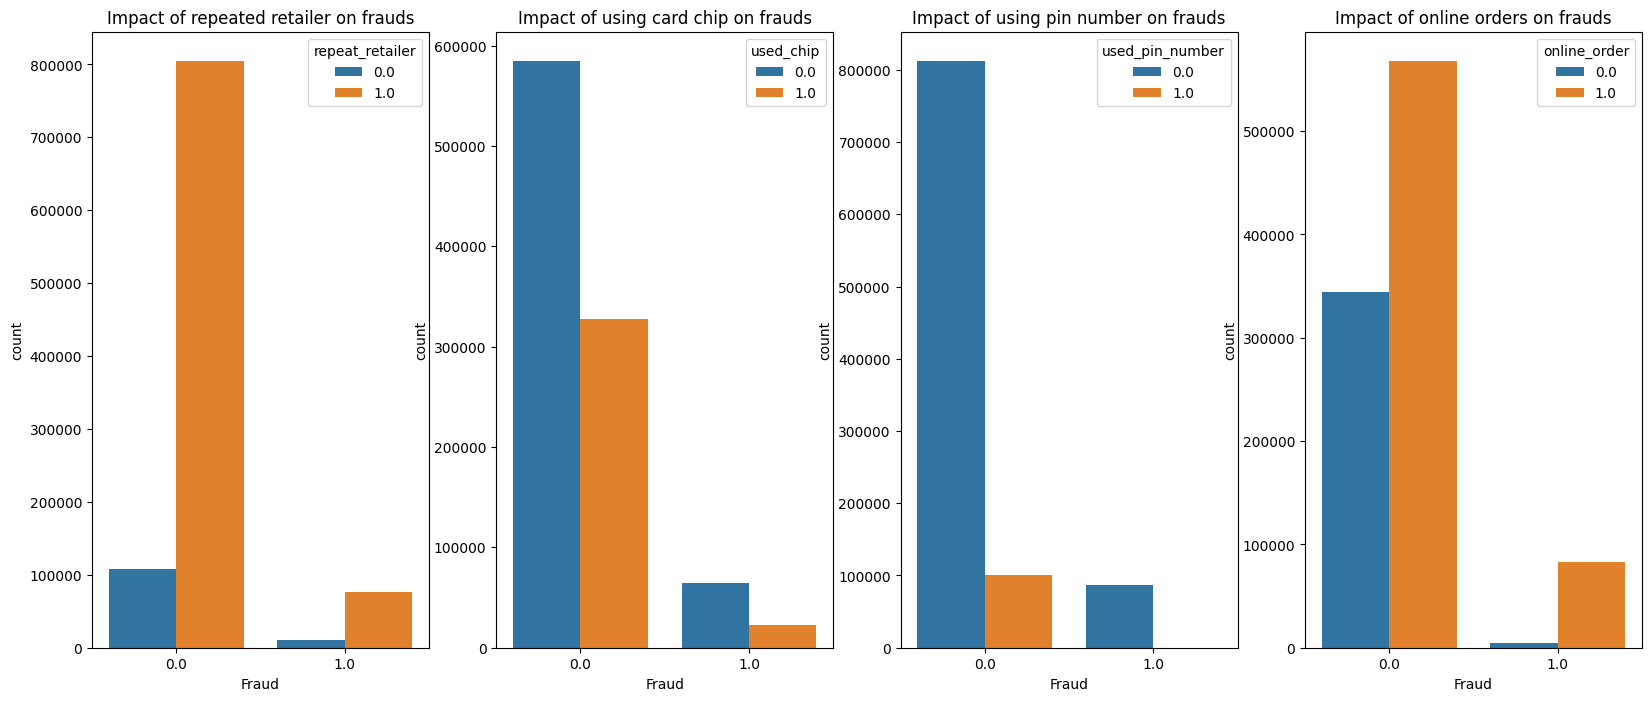

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,8))
plt.subplot(1,4,1)
sns.countplot(data=df, x='fraud', hue='repeat_retailer', ax=axes[0])
plt.title("Impact of repeated retailer on frauds")
plt.xlabel("Fraud")
plt.subplot(1,4,2)
sns.countplot(data=df, x='fraud', hue='used_chip', ax=axes[1])
plt.title("Impact of using card chip on frauds")
plt.xlabel("Fraud")
plt.subplot(1,4,3)
sns.countplot(data=df, x='fraud', hue='used_pin_number', ax=axes[2])
plt.title("Impact of using pin number on frauds")
plt.xlabel("Fraud")
plt.subplot(1,4,4)
sns.countplot(data=df, x='fraud', hue='online_order', ax=axes[3])
plt.title("Impact of online orders on frauds")
plt.xlabel("Fraud")
#plt.tight_layout()
plt.show()

The plots above show the impact of binary features on frauds.
For example we can see that all fraudolent transactions do not use pin and almost all of them are online orders.
Instead for genuine transactions there is a small percentage that use pin number and online and pysical orders are more equally distributed.

### Data non-idealities

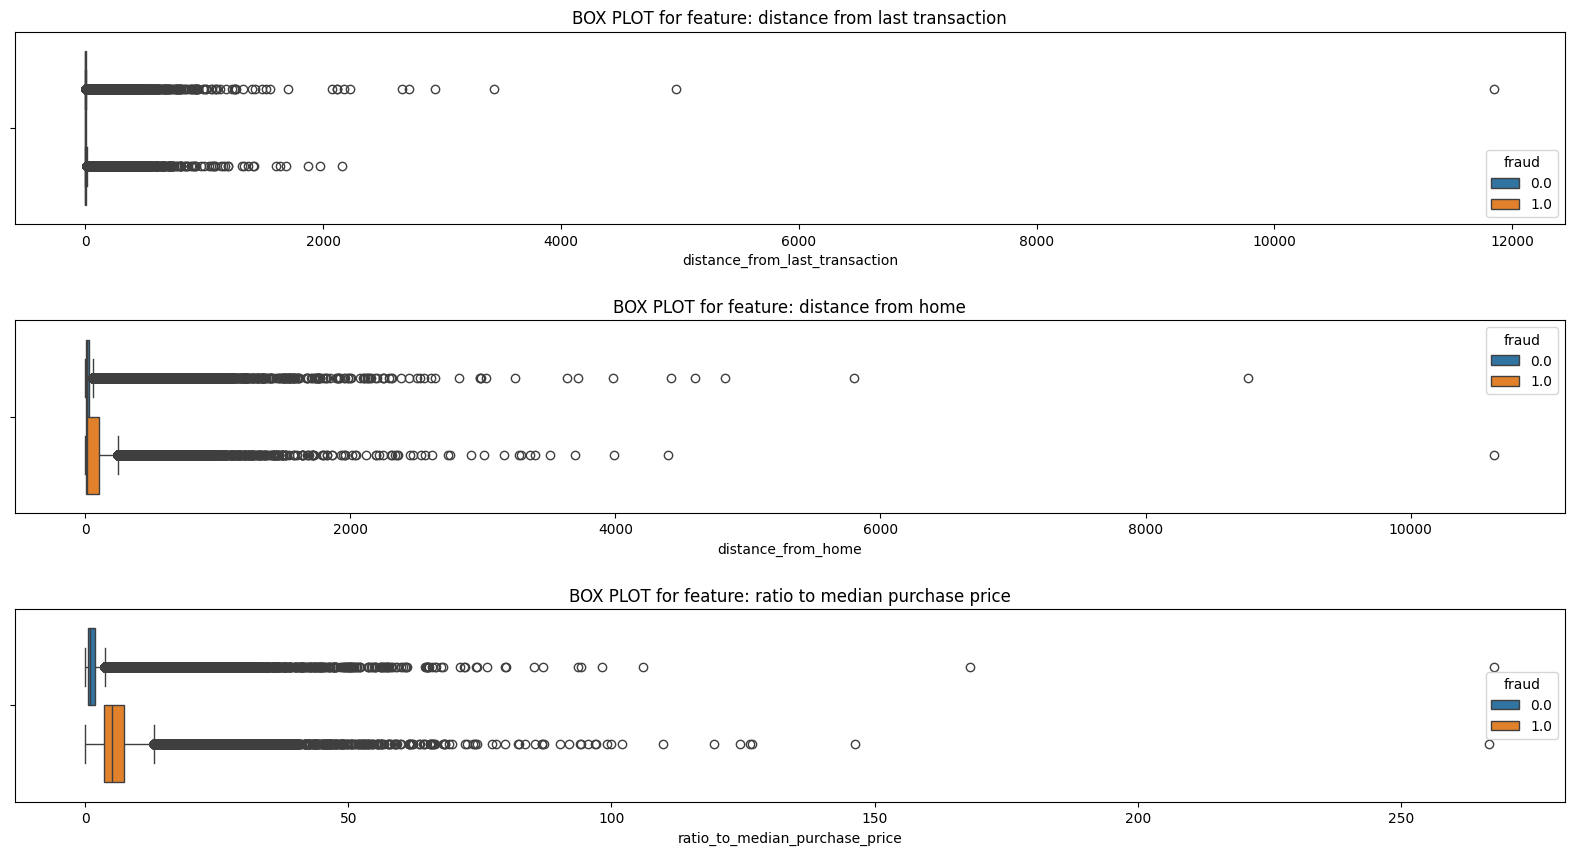

In [3]:
#box plot dell'intero dataset per visualizzare gli outliers per le feature continue
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
plt.subplot(3,1,1)
sns.boxplot(data=df, x='distance_from_last_transaction', hue='fraud')
#plt.xlim([0,200])
plt.title('BOX PLOT for feature: distance from last transaction')

plt.subplot(3,1,2)
sns.boxplot(data=df, x='distance_from_home', hue='fraud')
#plt.xlim([0,2000])
plt.title('BOX PLOT for feature: distance from home')

plt.subplot(3,1,3)
sns.boxplot(data=df, x='ratio_to_median_purchase_price', hue='fraud')
#plt.xlim([0,200])
plt.title('BOX PLOT for feature: ratio to median purchase price')

plt.subplots_adjust(hspace=0.5) 
plt.show()

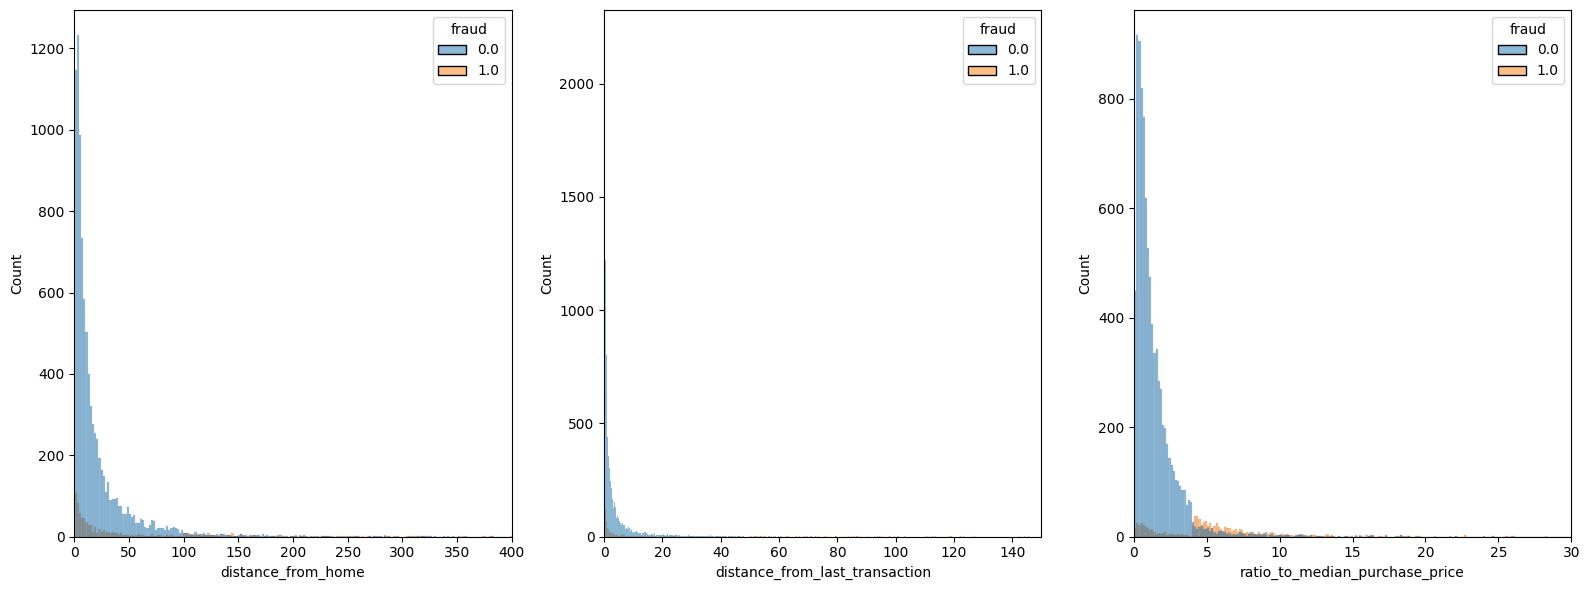

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

sns.histplot(data=df_sampled, x='distance_from_home', hue='fraud', ax=axes[0])
axes[0].set_xlim(0,400)
sns.histplot(data=df_sampled, x='distance_from_last_transaction', hue='fraud', ax=axes[1])
axes[1].set_xlim(0,150)
sns.histplot(data=df_sampled, x='ratio_to_median_purchase_price', hue='fraud', ax=axes[2])
axes[2].set_xlim(0,30)
plt.tight_layout()
plt.show()

The box plots above for the 3 continuos features show that the majority of samples are distributed in a limited range.

- For the feature *distance_from_home* most of the samples have values between 0 and 200
- for the feature *distance_from_last_transaction* the majority range between 0 and 40
- for the feature *ratio_to_median_purchase_price* the majority range between 0 and 20

However for all 3 features it is present a very high number of samples distributed on an extended range, these samples can represent possible **High Levarage Points** or **Outliers**.

## 2. Data Pre-Processing

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay
import time
from joblib import parallel_backend

We split our dataset in 3 sets: **training**, **test** and **development** representing respectively 60%, 20% and 20% of the dataset. 

The validation set is not necessary because we will use **cross validation** to perfom model selection. 

The **development set** is used to perform an assessment of the different models without useing the test set.

We use the **stratify** option to mantain the same class balacing of the original dataset in all sets.

In [5]:
#splitting dataset in 3 sets: train, development and test with 60%, 20% and 20% of the original dataset respectively
#we use the stratify option to mantain the same class balacing of the original dataset in all sets
X = df.drop(['fraud'], axis=1)
t = df['fraud']
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.4, random_state=100, stratify=t)
X_test, X_dev, t_test, t_dev = train_test_split(X_test, t_test, test_size=0.5, random_state=100, stratify=t_test)
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('X val shape: ', X_dev.shape)
print('Class balancing training set')
print((t_train == 0).sum()/len(t_train)*100)
print((t_train == 1).sum()/len(t_train)*100)
print('Class balancing test set')
print((t_test == 0).sum()/len(t_test)*100)
print((t_test == 1).sum()/len(t_test)*100)
print('Class balancing development set')
print((t_dev == 0).sum()/len(t_dev)*100)
print((t_dev == 1).sum()/len(t_dev)*100)


X train shape:  (600000, 7)
X test shape:  (200000, 7)
X val shape:  (200000, 7)
Class balancing training set
91.25966666666666
8.740333333333334
Class balancing test set
91.2595
8.740499999999999
Class balancing development set
91.25999999999999
8.74


As we analized in EDA, numerical features are caracterized by a large amount of HLP, however we have to be careful because the dataset is **highly unbalanced** so removing HLP can worsen class balancing.

We try to remove extreme high values in the 3 numerical features that are over the 99th percentile.

In [6]:
#removing of HLP in distance_from_last_transaction
columns_to_clean = ['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'distance_from_home']

X_train_clean = X_train.copy()
t_train_clean = t_train.copy()

for column in columns_to_clean:
    limit = np.percentile(X_train_clean[column], 99)
    indexes_to_drop = X_train_clean[(X_train_clean[column] > limit)].index
    X_train_clean = X_train_clean.drop(indexes_to_drop)
    t_train_clean = t_train_clean.drop(indexes_to_drop)

In [7]:
print('-- Training set before HLP removal --')
print(t_train.value_counts())
print('class balancing:')
print('0: ',(t_train == 0).sum()/len(t_train)*100)
print('1: ',(t_train == 1).sum()/len(t_train)*100)

print('-- Training set after HLP removal --')
print(t_train_clean.value_counts())
print('class balancing:')
print('0: ',(t_train_clean == 0).sum()/len(t_train_clean)*100)
print('1: ',(t_train_clean == 1).sum()/len(t_train_clean)*100)
print('samples affected for each class:')
print('0: ', (t_train == 0).sum() - (t_train_clean == 0).sum())
print('1: ', (t_train == 1).sum() - (t_train_clean == 1).sum())

-- Training set before HLP removal --
fraud
0.0    547558
1.0     52442
Name: count, dtype: int64
class balancing:
0:  91.25966666666666
1:  8.740333333333334
-- Training set after HLP removal --
fraud
0.0    538888
1.0     43291
Name: count, dtype: int64
class balancing:
0:  92.56397087493708
1:  7.43602912506291
samples affected for each class:
0:  8670
1:  9151


Comparing the training set before and after HLP removal we see that we removed a similar number of sample for each class but the training set is sligthly more unbalanced. During the training we will see how this removal affect the training of the model.

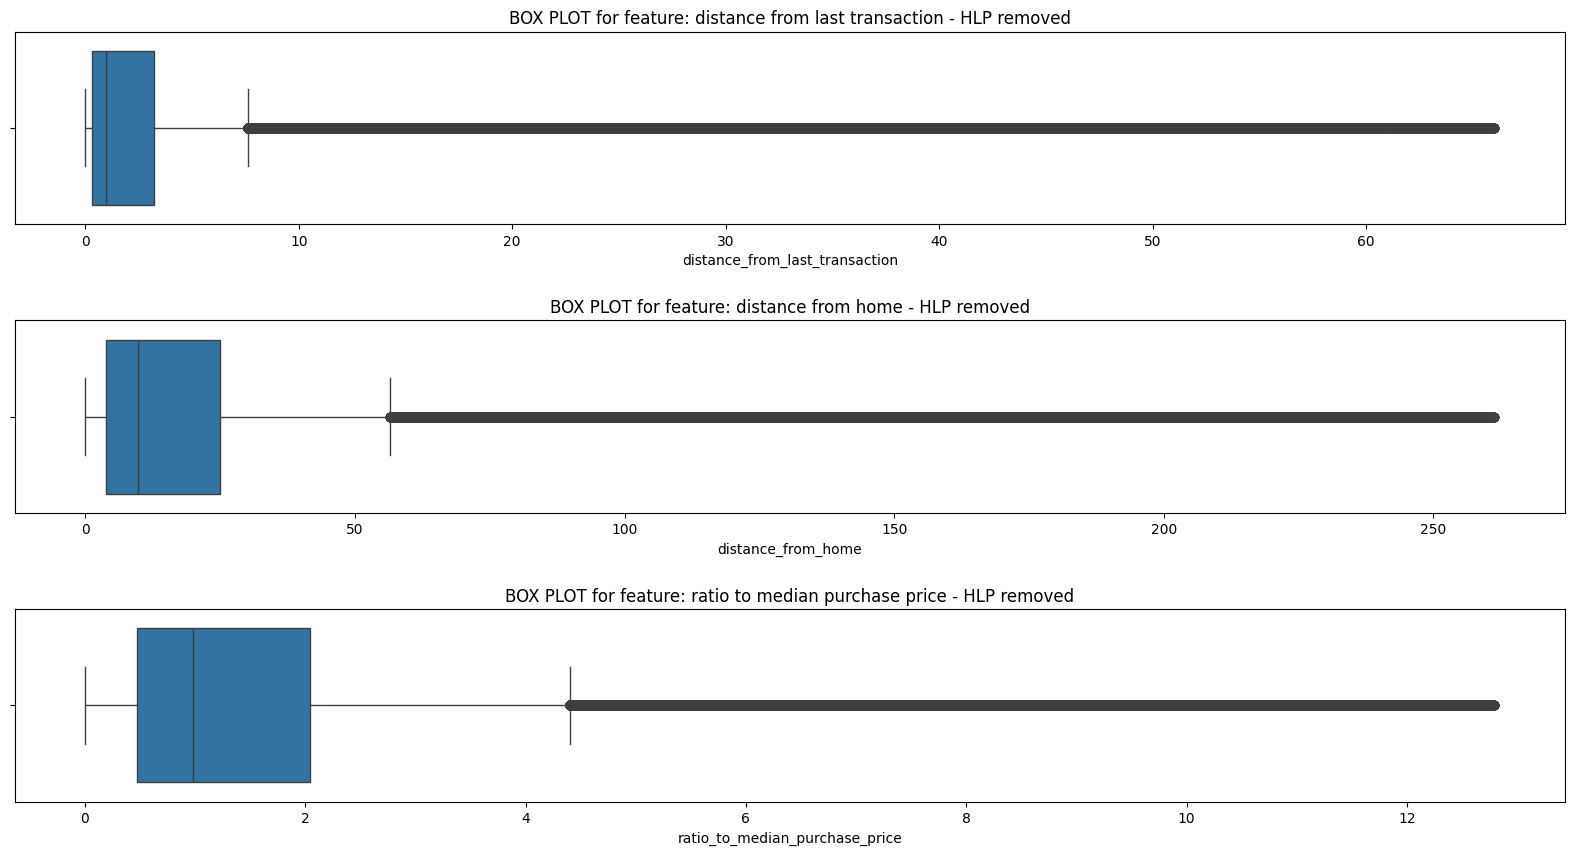

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
plt.subplot(3,1,1)
sns.boxplot(data=X_train_clean, x='distance_from_last_transaction')
plt.title('BOX PLOT for feature: distance from last transaction - HLP removed')

plt.subplot(3,1,2)
sns.boxplot(data=X_train_clean, x='distance_from_home')
plt.title('BOX PLOT for feature: distance from home - HLP removed')

plt.subplot(3,1,3)
sns.boxplot(data=X_train_clean, x='ratio_to_median_purchase_price')
plt.title('BOX PLOT for feature: ratio to median purchase price - HLP removed')

plt.subplots_adjust(hspace=0.5) 
plt.show()

To normalize our features we use 2 standardization tecniques: StandardScaler and RobustScaler.
RobustScaler, according to scikit learn documentation, is less sensitive to outliers so it can give better results in our case.

In [8]:
#feature normalization using standard scaler with clean training set
scaler = StandardScaler()
scaler.set_output(transform='pandas')
X_train_st = scaler.fit_transform(X_train_clean)
X_test_st = scaler.transform(X_test)
X_dev_st = scaler.transform(X_dev)

#feature normalization using robust scaler with clean training set
robust_scaler = RobustScaler()
robust_scaler.set_output(transform='pandas')
X_train_rs = robust_scaler.fit_transform(X_train_clean)
X_test_rs = robust_scaler.transform(X_test)
X_dev_rs = robust_scaler.transform(X_dev)

#feature normalization using robust scaler with original training set
X_train_rs_hlp = robust_scaler.fit_transform(X_train)
X_test_rs_hlp = robust_scaler.transform(X_test)
X_dev_rs_hlp = robust_scaler.transform(X_dev)

In [9]:
X_train_st.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
483771,0.254071,8.146993,-0.527588,0.368308,-0.734138,-0.334532,0.733426
11082,0.759365,-0.429776,1.540810,0.368308,-0.734138,-0.334532,-1.363463
941913,-0.608793,0.579602,-0.062128,-2.715117,-0.734138,-0.334532,-1.363463
888810,-0.566888,-0.473499,1.162499,0.368308,1.362141,-0.334532,0.733426
528035,2.320971,4.482793,-0.036922,0.368308,-0.734138,-0.334532,0.733426


In [10]:
X_train_st.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,582179.0,6.365457e-17,1.000001,-0.658413,-0.544291,-0.366695,0.082797,7.108355
distance_from_last_transaction,582179.0,9.249777e-17,1.000001,-0.486241,-0.446452,-0.353048,-0.047555,8.509465
ratio_to_median_purchase_price,582179.0,-8.304814e-17,1.000001,-0.873997,-0.624437,-0.351697,0.214149,5.949256
repeat_retailer,582179.0,3.266942e-17,1.000001,-2.715117,0.368308,0.368308,0.368308,0.368308
used_chip,582179.0,5.823255e-18,1.000001,-0.734138,-0.734138,-0.734138,1.362141,1.362141
used_pin_number,582179.0,9.971391e-18,1.000001,-0.334532,-0.334532,-0.334532,-0.334532,2.989255
online_order,582179.0,-1.353400e-16,1.000001,-1.363463,-1.363463,0.733426,0.733426,0.733426


In [11]:
X_train_rs.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
483771,0.989919,21.308888,-0.209747,0.0,0.0,0.0,0.0
11082,1.795697,-0.192350,2.256783,0.0,0.0,0.0,-1.0
941913,-0.386067,2.338075,0.345306,-1.0,0.0,0.0,-1.0
888810,-0.319243,-0.301960,1.805654,0.0,1.0,0.0,0.0
528035,4.285949,12.123047,0.375364,0.0,0.0,0.0,0.0


In [12]:
X_train_rs.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,582179.0,0.584759,1.594675,-0.465195,-0.283208,0.0,0.716792,11.920262
distance_from_last_transaction,582179.0,0.885063,2.506918,-0.333904,-0.234155,0.0,0.765845,22.217577
ratio_to_median_purchase_price,582179.0,0.419393,1.192484,-0.622833,-0.325237,0.0,0.674763,7.513781
repeat_retailer,582179.0,-0.119448,0.324315,-1.000000,0.000000,0.0,0.000000,0.000000
used_chip,582179.0,0.350210,0.477036,0.000000,0.000000,0.0,1.000000,1.000000
used_pin_number,582179.0,0.100648,0.300862,0.000000,0.000000,0.0,0.000000,1.000000
online_order,582179.0,-0.349769,0.476897,-1.000000,-1.000000,0.0,0.000000,0.000000


As we already analized during EDA, the dataset does not contain missing or duplicated values

## 3. Model Selection

### Logistic Regression

We start by creating a simple Logistic Regression model with default parameters as a base model

In [17]:
from sklearn import linear_model

In [33]:
#logistic regression with defaut parameters
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train_st, t_train_clean)

#evaluation on validation set
t_dev_pred = log_reg.predict(X_dev_st)
print(classification_report(t_dev, t_dev_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    182520
         1.0       0.80      0.76      0.78     17480

    accuracy                           0.96    200000
   macro avg       0.89      0.87      0.88    200000
weighted avg       0.96      0.96      0.96    200000



Using default parameters we obtain an accuracy of 0.96. However the dataset we are using is highly unbalanced so accuracy is not an appropriated metric to use. To better evaluate performance of the model we can use **precision**, **recall** and **f1-score**.
In this case we obtain for class 1,that identify a fraud, an high precision value but a low recall and an f1-score of 0.78.

In [18]:
#logistic regression using regularization and weight balancing
log_reg2 = linear_model.LogisticRegression()

parameters = [{'C':[1e5,1e3,1], 'class_weight':['balanced'], 'penalty':['l1','l2'], 'solver':['liblinear']}]

kfolds = StratifiedKFold(n_splits=5)
grid_search_lg = GridSearchCV(estimator=log_reg2, param_grid=parameters, scoring='recall', cv = kfolds, verbose=10, n_jobs=-1)

grid_search_lg.fit(X_train_st, t_train_clean)

print('Best recall score found by GridSearchCV: ', grid_search_lg.best_score_)
print('Parameters that give the best results :', (grid_search_lg.best_params_))
print('time to fit the best model:', grid_search_lg.refit_time_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best recall score found by GridSearchCV:  0.9618626968667389
Parameters that give the best results : {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
time to fit the best model: 1.7612476348876953


In [20]:
t_start = time.time()
t_dev_pred2 = grid_search_lg.predict(X_dev_st)
t_end = time.time()
print("prediction time: ", t_end - t_start, " seconds")
print(classification_report(t_dev, t_dev_pred2, digits=3))
print('roc auc: ', roc_auc_score(t_dev, t_dev_pred2))

prediction time:  0.020998477935791016  seconds
              precision    recall  f1-score   support

         0.0      0.997     0.927     0.961    182520
         1.0      0.559     0.972     0.710     17480

    accuracy                          0.931    200000
   macro avg      0.778     0.949     0.835    200000
weighted avg      0.959     0.931     0.939    200000

roc auc:  0.9494147470626083


In [ ]:
'''precision, recall, threshold = precision_recall_curve(t_dev, t_dev_pred2)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()'''

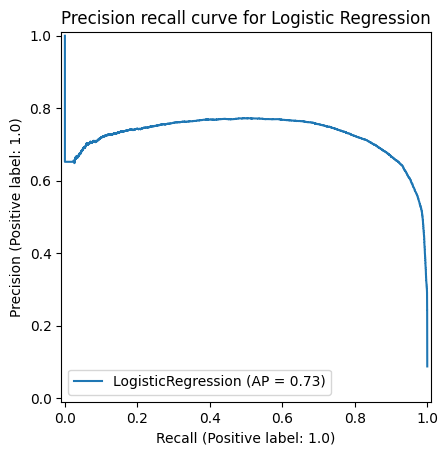

In [22]:
PrecisionRecallDisplay.from_estimator(grid_search_lg.best_estimator_, X_dev_st, t_dev)
plt.title("Precision recall curve for Logistic Regression")
plt.show()

By modifying the model using class weight balancing and trying different parameters, we obtain an higher recall value but a lower precision, f1-score rimane the same.
In our case it is more important to have a low number of false negatives respect to false positives, so we are interested to maximize recall instead of precision.

##### Logistic Regression using dataset normalized with RobustScaler

In [22]:
#logistic regression using regularization and weight balancing
log_reg3 = linear_model.LogisticRegression(C=1, class_weight='balanced', penalty='l2', solver='liblinear')
log_reg3.fit(X_train_rs, t_train_clean)
t_dev_pred3 = log_reg3.predict(X_dev_rs)
print(classification_report(t_dev, t_dev_pred3, digits=3))
print('roc auc: ', roc_auc_score(t_dev, t_dev_pred3))

              precision    recall  f1-score   support

         0.0      0.997     0.927     0.961    182520
         1.0      0.559     0.972     0.710     17480

    accuracy                          0.931    200000
   macro avg      0.778     0.949     0.835    200000
weighted avg      0.959     0.931     0.939    200000

roc auc:  0.949403789359343


Logistic Regression does not benefit of RobustScaler normalization and results remain low for the class 1 that represents fraud.

##### Logistic Regression using training set without HLP removal

In [58]:
log_reg4 = linear_model.LogisticRegression(C=1, class_weight='balanced', penalty='l2', solver='liblinear')
log_reg4.fit(X_train_rs_hlp, t_train)
t_dev_pred4 = log_reg4.predict(X_dev_rs_hlp)
print(classification_report(t_dev, t_dev_pred4, digits=3))
print('roc auc: ', roc_auc_score(t_dev, t_dev_pred4))

              precision    recall  f1-score   support

         0.0      0.995     0.932     0.963    182520
         1.0      0.574     0.953     0.717     17480

    accuracy                          0.934    200000
   macro avg      0.785     0.943     0.840    200000
weighted avg      0.958     0.934     0.941    200000

roc auc:  0.9428745904652436


In [20]:

log_reg_scores = {
    'Model': ['Log Reg default','Log Reg Best + StandardScaler', 'Log Reg Best+ RobustScaler & HLP mantained'],
    'Precision': [0.80, 0.559, 0.574],
    'Recall': [0.76, 0.972, 0.953],
    'F1 Score': [0.78, 0.710, 0.717]
}
log_reg_df = pd.DataFrame(data = log_reg_scores)
log_reg_df

,Model,Precision,Recall,F1 Score
0,Log Reg default,0.800,0.760,0.780
1,Log Reg Best + StandardScaler,0.559,0.972,0.710
2,Log Reg Best+ RobustScaler & HLP mantained,0.574,0.953,0.717


Training the model on the dataset normalized but without removing HLP we don't improve general performance of the model, Recall remain high but precision remain too low.

### K-Nearest Neighbors classifier

We try to utilize K-Nearest-neighbors classifier that should be less sensible to outliers.

We evaluate its performance with different k values and in the case training set with and without HLP.

##### K-NN using dataset normalized with StandardScaler

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#using standardScaler
knn1 = KNeighborsClassifier()
parameters = [{'n_neighbors':[3,5,10]}]
kfolds = StratifiedKFold(n_splits=5, shuffle=True)
grid_search_knn1 = GridSearchCV(estimator=knn1, param_grid=parameters, scoring='recall', cv = kfolds, verbose=10, n_jobs=-1)

grid_search_knn1.fit(X_train_st, t_train_clean)

print('Best recall found by GridSearchCV: ', grid_search_knn1.best_score_)
print('Parameters that give the best results :', (grid_search_knn1.best_params_))
print('time to fit the best model:', grid_search_knn1.refit_time_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best recall found by GridSearchCV:  0.9895821270113914
Parameters that give the best results : {'n_neighbors': 3}
time to fit the best model: 1.1779999732971191


In [22]:
t_start = time.time()
t_pred_knn1 = grid_search_knn1.predict(X_dev_st)
t_end = time.time()
print("prediction time: ", t_end - t_start, " seconds")
print('KNN model with parameters:', grid_search_knn1.best_estimator_)
print(classification_report(t_dev, t_pred_knn1))
print('roc auc: ', roc_auc_score(t_dev, t_pred_knn1))

prediction time:  22.293495655059814  seconds
KNN model with parameters: KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182520
         1.0       0.99      0.99      0.99     17480

    accuracy                           1.00    200000
   macro avg       1.00      0.99      1.00    200000
weighted avg       1.00      1.00      1.00    200000

roc auc:  0.9946682875040559


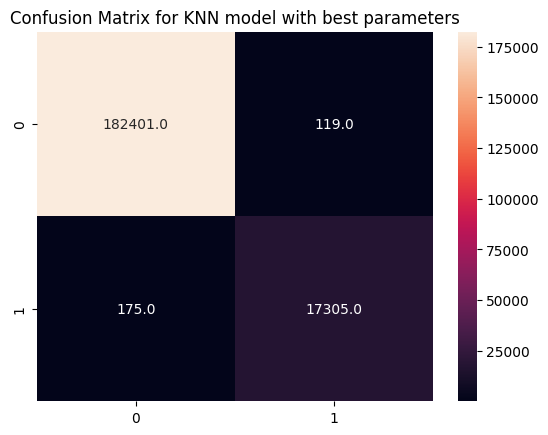

In [23]:
conf_matr_dev = confusion_matrix(t_dev, t_pred_knn1)
sns.heatmap(conf_matr_dev,annot=True,fmt=".1f")
plt.title('Confusion Matrix for KNN model with best parameters')
plt.show()

##### K-NN using dataset normalized with RobustScaler

In [26]:
#using RobustScaler

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_rs, t_train_clean)
t_pred_knn2 = knn2.predict(X_dev_rs)

print(classification_report(t_dev, t_pred_knn2))
print('roc auc: ', roc_auc_score(t_dev, t_pred_knn2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182520
         1.0       0.98      0.97      0.97     17480

    accuracy                           1.00    200000
   macro avg       0.99      0.98      0.99    200000
weighted avg       1.00      1.00      1.00    200000

roc auc:  0.9841225888664719


Training KNN using the dataset normalized with RobustScaler we get slightly worse performance but still a nearly perfect result.

##### K-NN using dataset normalized with RobustScaler without removing HLP

In [28]:
#using training set without removing HLP

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_rs_hlp, t_train)
t_pred_knn3 = knn3.predict(X_dev_rs_hlp)

print(classification_report(t_dev, t_pred_knn3))
print('roc auc: ', roc_auc_score(t_dev, t_pred_knn3))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182520
         1.0       0.98      0.99      0.98     17480

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000

roc auc:  0.991770275888389


From our results KNN performance are very good using K=3 neighbors.

There is not much difference between the 3 cases we tested with StandardScaler, RobustScaler and without HLP removing

### Neural Network - MLP

##### MLP using dataset normalized with StandardScaler

In [11]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp = MLPClassifier(max_iter=200)
parameters = {
    'hidden_layer_sizes': [(50,), (50,50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'early_stopping':[True]
}

kfolds = StratifiedKFold(n_splits=3)
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=parameters, scoring='recall', n_jobs=-1, cv=kfolds, verbose=10)
grid_search_mlp.fit(X_train_st, t_train_clean)

print('Best recall score found by GridSearchCV: ', grid_search_mlp.best_score_)
print('Parameters that give the best results :', (grid_search_mlp.best_params_))
print('time to fit the best model:', grid_search_mlp.refit_time_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best recall score found by GridSearchCV:  0.995426352296978
Parameters that give the best results : {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
time to fit the best model: 114.11529922485352


In [32]:
t_start = time.time()
t_pred_mlp = grid_search_mlp.predict(X_dev_st)
t_end = time.time()
print("prediction time: ", t_end - t_start, " seconds")
print('MLP model with parameters:', grid_search_mlp.best_estimator_)
print(classification_report(t_dev, t_pred_mlp, digits=3))
print('roc auc: ', roc_auc_score(t_dev, t_pred_mlp))

prediction time:  0.8394947052001953  seconds
MLP model with parameters: MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(100, 100))
              precision    recall  f1-score   support

         0.0      1.000     0.994     0.997    182520
         1.0      0.943     0.998     0.970     17480

    accuracy                          0.995    200000
   macro avg      0.971     0.996     0.983    200000
weighted avg      0.995     0.995     0.995    200000

roc auc:  0.9963211579960392


Text(0.5, 1.0, 'Confusion Matrix for NN model with best parameters')

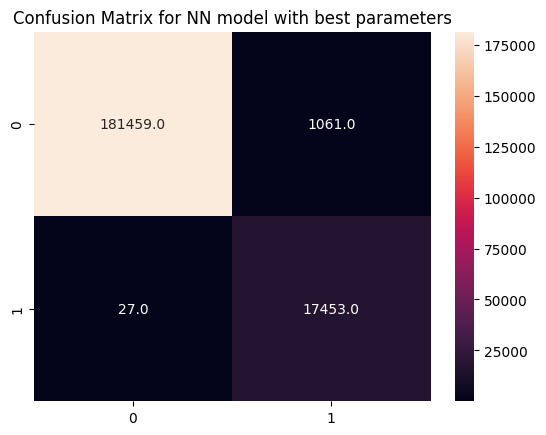

In [33]:
conf_matr_dev = confusion_matrix(t_dev, t_pred_mlp)
sns.heatmap(conf_matr_dev,annot=True, fmt=".1f")
plt.title('Confusion Matrix for NN model with best parameters')

##### MLP using dataset normalized with RobustScaler

In [12]:
mlp2 = MLPClassifier(max_iter=200, hidden_layer_sizes=(100,100), activation='tanh',solver='adam',alpha=0.0001,early_stopping=True)
mlp2.fit(X_train_rs,t_train_clean)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(100, 100))

In [14]:
t_pred_mlp2 = mlp2.predict(X_dev_rs)
print(classification_report(t_dev, t_pred_mlp2, digits=3))
print('roc auc: ', roc_auc_score(t_dev, t_pred_mlp2))

              precision    recall  f1-score   support

         0.0      0.999     0.996     0.997    182520
         1.0      0.956     0.992     0.974     17480

    accuracy                          0.995    200000
   macro avg      0.977     0.994     0.985    200000
weighted avg      0.995     0.995     0.995    200000

roc auc:  0.9938242685294262


##### MLP using dataset normalized with RobustScaler without removing HLP

In [15]:
mlp3 = MLPClassifier(max_iter=200, hidden_layer_sizes=(100,100), activation='tanh',solver='adam',alpha=0.0001,early_stopping=True)
mlp3.fit(X_train_rs_hlp,t_train)

t_pred_mlp3 = mlp3.predict(X_dev_rs_hlp)
print(classification_report(t_dev, t_pred_mlp3, digits=3))
print('roc auc: ', roc_auc_score(t_dev, t_pred_mlp3))

              precision    recall  f1-score   support

         0.0      1.000     0.999     0.999    182520
         1.0      0.993     0.997     0.995     17480

    accuracy                          0.999    200000
   macro avg      0.996     0.998     0.997    200000
weighted avg      0.999     0.999     0.999    200000

roc auc:  0.9979045022369261


The Neural Netwok gives very good results with 2 hidden layers (100,100), activation tanh and alpha=0.0001

We trained the model using different normalization methods and using a full training set or one where we removed HLP. We obtain nearly perfect results using the full training set and RobustScaler as normalization.

In [19]:
mlp_scores = {
    'Model': ['MLP Best + StandardScaler','MLP Best + RobustScaler', 'MLP Best + RobustScaler + HLP mantained'],
    'Precision': [0.943, 0.985, 0.993],
    'Recall': [0.998, 0.999, 0.997],
    'F1 Score': [0.970, 0.974, 0.995]
}
mlp_df = pd.DataFrame(data = mlp_scores)
mlp_df

,Model,Precision,Recall,F1 Score
0,MLP Best + StandardScaler,0.943,0.998,0.970
1,MLP Best + RobustScaler,0.956,0.992,0.974
2,MLP Best + RobustScaler + HLP mantained,0.993,0.997,0.995


## 4. Model Assessment

In conclusion we tested 3 different classifiers: Logistic Regression, K-nearest Neighbors and Neural Network.
Except Logistic Regression, the 2 other models tested gave near perfect results on development set after tuning their parameters with GridSearchCV.

The results are summarized in the following table:

In [25]:
dev_scores = {
    'Model': ['Logistic Regression (no HLP)','K-Nearest Neighbors (StandardScaler & no HLP)','Neural Network (RobustScaler & HLP mantained)'],
    'Precision': [0.559, 0.99,0.993],
    'Recall': [0.972, 0.99,0.997],
    'F1 Score': [0.710, 0.99,0.995],
    'Time to train': [1.07, 1.18, 114.11],
    'Time to predict': [0.004, 22.29, 0.83]
}
dev_scores_df = pd.DataFrame(data = dev_scores)
dev_scores_df

,Model,Precision,Recall,F1 Score,Time to train,Time to predict
0,Logistic Regression (no HLP),0.559,0.972,0.710,1.07,0.004
1,K-Nearest Neighbors (StandardScaler & no HLP),0.990,0.990,0.990,1.18,22.290
2,Neural Network (RobustScaler & HLP mantained),0.993,0.997,0.995,114.11,0.830


The best models found are:

- **K Nearest Neighbors Classifier** with (n_neighbors=3), using a dataset normalized with StandardScaler and removing HLP from training set
- **Neural Network** with (hidden_layer_sizes=(100,100), activation='tanh',solver='adam',alpha=0.0001,early_stopping=True), using a dataset normalized with RobustScaler and a full training set

We analyzed also the **time** necessary to train the models and to predict all the sample on the dev set (200000 sample). 

We found that:
- **logistic regression** is very fast both in training and in prediction
- **Nearest Neighbors** is as fast as Logistic Regression in training but it is slower in prediction as expected given the high number of samples
- **Neural Network** has a very slow training phase (almost 2 minutes) hovewer it is faster than KNN to predict a high number of samples.

According to these results we choose the **Neural Network classifier** given it has a faster inference time that could be useful in a production environment where the classifier should be able to analyze an high number of transaction in real time and identify the fraudolent ones.

In [9]:
#merge of training set and development set
X_traindev = pd.concat([X_train_rs_hlp, X_dev_rs_hlp], axis=0)
t_traindev = pd.concat([t_train, t_dev], axis=0)
print(X_traindev.shape)
print(t_traindev.shape)

(800000, 7)
(800000,)


In [29]:
X_traindev.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,0.761045,1.313334,0.510797,-0.118351,0.350636,0.100630,-0.349575
std,3.013011,8.611221,1.727914,0.323024,0.477170,0.300838,0.476836
min,-0.456746,-0.326431,-0.612267,-1.000000,0.000000,0.000000,-1.000000
25%,-0.279404,-0.229594,-0.321320,0.000000,0.000000,0.000000,-1.000000
50%,-0.000836,-0.000113,0.000438,0.000000,0.000000,0.000000,0.000000
75%,0.720503,0.769046,0.678312,0.000000,1.000000,0.000000,0.000000
max,485.592528,3868.463334,164.552730,0.000000,1.000000,1.000000,0.000000


In [10]:
from sklearn.neural_network import MLPClassifier

#training of the model on train+validation set
mlp_best = MLPClassifier(max_iter=200, hidden_layer_sizes=(100, 100), alpha=0.0001, activation='tanh', early_stopping=True, solver='adam', verbose=True)
mlp_best.fit(X_traindev,t_traindev)

Iteration 1, loss = 0.03187981
Validation score: 0.996838
Iteration 2, loss = 0.00984674
Validation score: 0.996875
Iteration 3, loss = 0.00738449
Validation score: 0.997175
Iteration 4, loss = 0.00640126
Validation score: 0.998400
Iteration 5, loss = 0.00568334
Validation score: 0.997212
Iteration 6, loss = 0.00511308
Validation score: 0.997450
Iteration 7, loss = 0.00508848
Validation score: 0.998525
Iteration 8, loss = 0.00481417
Validation score: 0.999138
Iteration 9, loss = 0.00435988
Validation score: 0.998875
Iteration 10, loss = 0.00432742
Validation score: 0.998938
Iteration 11, loss = 0.00406831
Validation score: 0.998313
Iteration 12, loss = 0.00408493
Validation score: 0.998263
Iteration 13, loss = 0.00396309
Validation score: 0.998513
Iteration 14, loss = 0.00376657
Validation score: 0.998800
Iteration 15, loss = 0.00362795
Validation score: 0.998325
Iteration 16, loss = 0.00363297
Validation score: 0.999112
Iteration 17, loss = 0.00361558
Validation score: 0.998737
Iterat

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(100, 100), verbose=True)

In [11]:
t_pred_test = mlp_best.predict(X_test_rs_hlp)
print('Final test of the model - metrics')
print(classification_report(t_test, t_pred_test))
print('roc auc: ', roc_auc_score(t_test, t_pred_test))

Final test of the model - metrics
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

roc auc:  0.9962155222845137


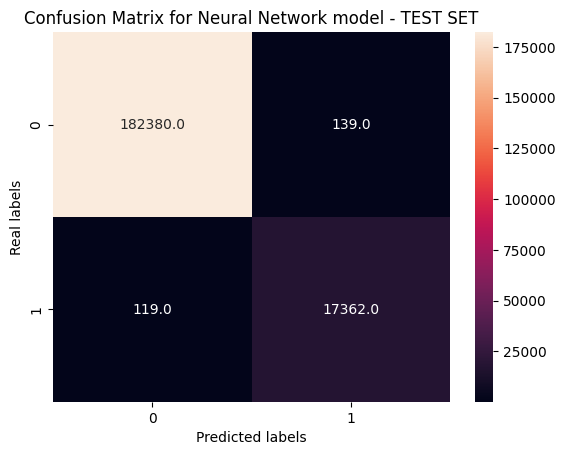

In [25]:
conf_matr_test = confusion_matrix(t_test, t_pred_test)
sns.heatmap(conf_matr_test,annot=True, fmt=".1f")
plt.title('Confusion Matrix for Neural Network model - TEST SET')
plt.xlabel("Predicted labels")
plt.ylabel("Real labels")
plt.show()

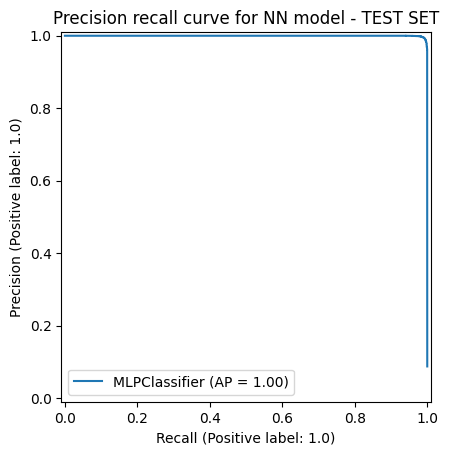

In [16]:
PrecisionRecallDisplay.from_estimator(mlp_best, X_test_rs_hlp, t_test)
plt.title("Precision recall curve for NN model - TEST SET")
plt.show()

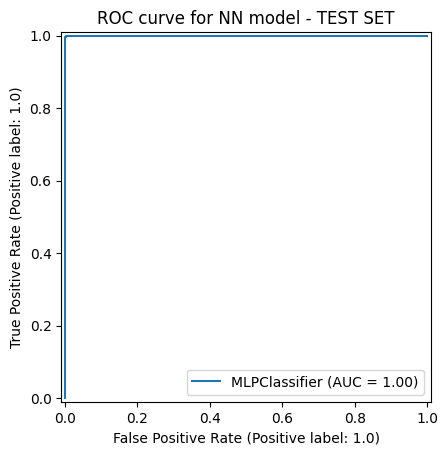

In [23]:
RocCurveDisplay.from_estimator(mlp_best,X_test_rs_hlp, t_test)
plt.title("ROC curve for NN model - TEST SET")
plt.show()